In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random as r
import scipy.stats as stats
from statsmodels.formula.api import ols

In [51]:
def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

# функция имитирующая случайные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res

In [324]:
np.random.seed(0)
# mean = 1.5, stddev = 2.5
x = 2.5 * np.random.randn(500) + 1.5
# generate 100 residual terms
res = 0.5 * np.random.randn(500)
# Actual values of Y
y = 1 + 0.3 * x + res
y1 = randomize(y, 0.5)
y2 = randomize(y, 2)

In [325]:
# Альтернативный метод

In [326]:
np_cov_1 = np.cov(x, y)[1][0]
np_cov_2 = np.cov(x, y1)[1][0]
np_cov_3 = np.cov(x, y2)[1][0]
print('np_cov_1:', np_cov_1)
print('np_cov_2:', np_cov_2)
print('np_cov_3:', np_cov_3)

np_cov_1: 1.8220902367686327
np_cov_2: 1.9584271302936733
np_cov_3: 1.4688306456263636


In [327]:
print(f'''
cov1: {cov(x, y):.2f}
cov2: {cov(x, y1):.2f}
cov3: {cov(x, y2):.2f}

cor1: {cor(x, y):.2f}
cor2: {cor(x, y1):.2f}
cor3: {cor(x, y2):.2f}
''')


cov1: 1.82
cov2: 1.96
cov3: 1.47

cor1: 0.83
cor2: 0.43
cor3: 0.09



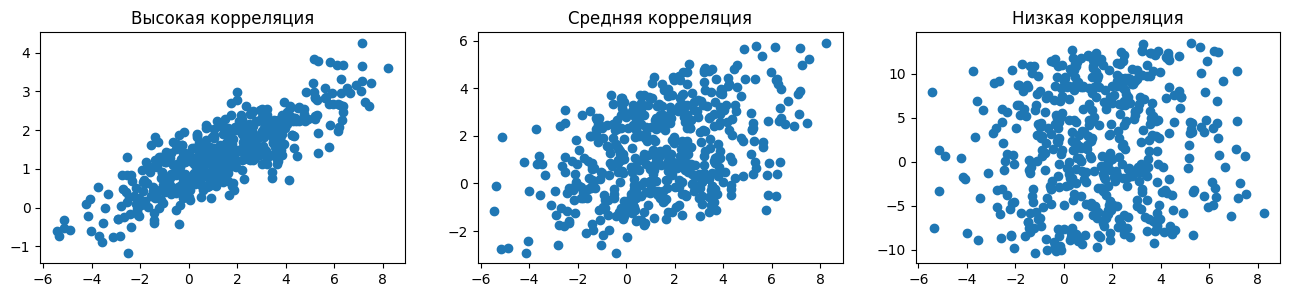

In [328]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
ax1.scatter(x, y)
ax2.scatter(x, y1)
ax3.scatter(x, y2)
ax1.set_title('Высокая корреляция')
ax2.set_title('Средняя корреляция')
ax3.set_title('Низкая корреляция')
plt.show()

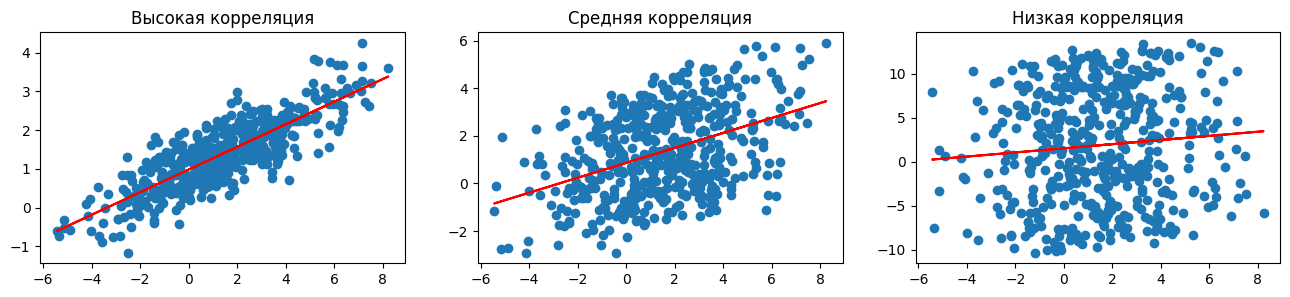

In [329]:
# Демонстрация метода наименьших квадратов
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
b1 = y.std()/x.std()*cor(x, y)
b0 = y.mean() - b1*x.mean()
f = lambda x: b0 + b1*x
y_pred = f(x)
ax1.scatter(x, y)
ax1.set_title('Высокая корреляция')
ax1.plot(x, y_pred, color='r')
b1 = y1.std()/x.std()*cor(x, y1)
b0 = y1.mean() - b1*x.mean()
f = lambda x: b0 + b1*x
y_pred = f(x)
ax2.scatter(x, y1)
ax2.set_title('Средняя корреляция')
ax2.plot(x, y_pred, color='r')
b1 = y2.std()/x.std()*cor(x, y2)
b0 = y2.mean() - b1*x.mean()
f = lambda x: b0 + b1*x
y_pred = f(x)
ax3.scatter(x, y2)
ax3.set_title('Низкая корреляция')
ax3.plot(x, y_pred, color='r')
plt.show()

In [330]:
# Диагностика простых линейных регрессионных моделей.
# Создаем датафреймы с данными из массивов координат x и y, y1, y2.
# Обрати внимание на синтаксис: 'x': pd.Series(x)
dataframe = pd.DataFrame({'x': pd.Series(x), 'y': pd.Series(y)})
dataframe1 = pd.DataFrame({'x': pd.Series(x), 'y': pd.Series(y1)})
dataframe2 = pd.DataFrame({'x': pd.Series(x), 'y': pd.Series(y2)})
# Создаем модель по методу наименьших квадратов (OLS — ordinary least squares)
# Синтаксис ols(формула, data=источник данных)
ols_model = ols('y ~ x', data=dataframe).fit()
ols_model1 = ols('y ~ x', data=dataframe1).fit()
ols_model2 = ols('y ~ x', data=dataframe2).fit()
print(ols_model.summary())
print(ols_model1.summary())
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1114.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          4.22e-129
Time:                        14:33:05   Log-Likelihood:                -350.01
No. Observations:                 500   AIC:                             704.0
Df Residuals:                     498   BIC:                             712.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9789      0.025     38.851      0.0

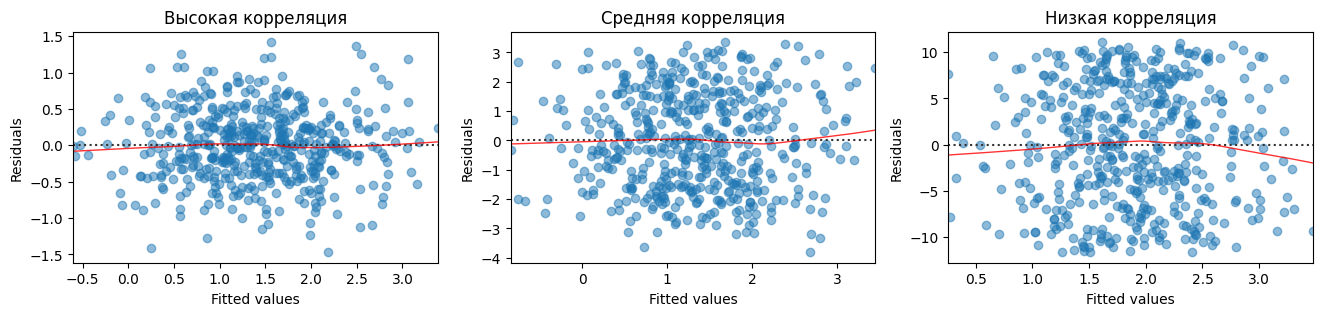

In [331]:
# Residuals vs Fitted Plot
# Предсказанные значения моделью
model_fitted_y = ols_model.fittedvalues
model_fitted_y1 = ols_model1.fittedvalues
model_fitted_y2 = ols_model2.fittedvalues

# Графики
figure1, axes = plt.subplots(1, 3, figsize=(16,3))
plot1 = sns.residplot(x=model_fitted_y, y='y', data=dataframe, lowess=True, scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=axes[0])
plot2 = sns.residplot(x=model_fitted_y1, y='y', data=dataframe1, lowess=True, scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},  ax=axes[1])
plot3 = sns.residplot(x=model_fitted_y2, y='y', data=dataframe2, lowess=True, scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},  ax=axes[2])
plot1.set_title('Высокая корреляция')
plot1.set_xlabel('Fitted values')
plot1.set_ylabel('Residuals')
plot2.set_title('Средняя корреляция')
plot2.set_xlabel('Fitted values')
plot2.set_ylabel('Residuals')
plot3.set_title('Низкая корреляция')
plot3.set_xlabel('Fitted values')
plot3.set_ylabel('Residuals')
plt.show()

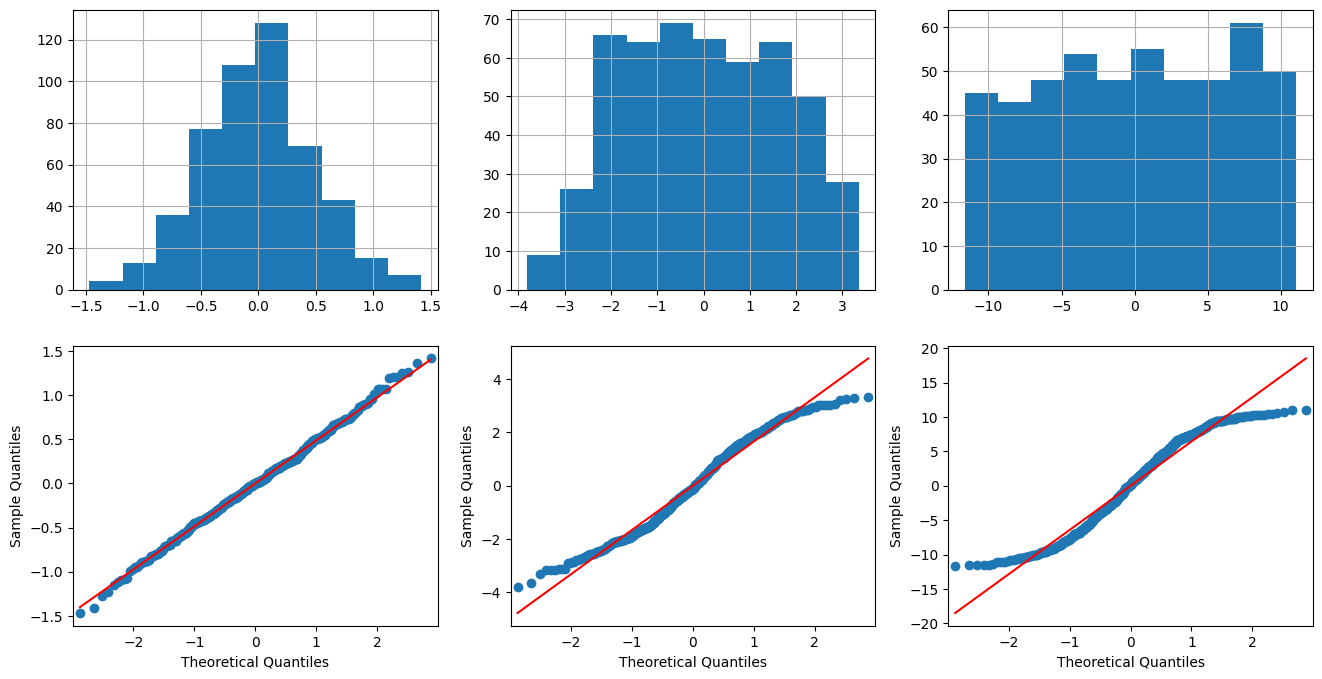

In [332]:
# Histogram of residuals and Normal Q-Q Plot of residuals
# Проверяем нормальность распределения остатков
# Добавляем в таблицы предсказанные моделью значения и разницу между предсказанным и фактом
dataframe['fitted_y'] = model_fitted_y
dataframe['residuals'] = dataframe['y'] - dataframe['fitted_y']
dataframe1['fitted_y'] = model_fitted_y1
dataframe1['residuals'] = dataframe1['y'] - dataframe1['fitted_y']
dataframe2['fitted_y'] = model_fitted_y2
dataframe2['residuals'] = dataframe2['y'] - dataframe2['fitted_y']

figure, axes = plt.subplots(2, 3, figsize=(16,8))
dataframe['residuals'].hist(ax=axes[0, 0])
dataframe1['residuals'].hist(ax=axes[0, 1])
dataframe2['residuals'].hist(ax=axes[0, 2])
sm.qqplot(dataframe['residuals'],line='s', ax=axes[1, 0])
sm.qqplot(dataframe1['residuals'], line='s', ax=axes[1, 1])
sm.qqplot(dataframe2['residuals'], line='s', ax=axes[1, 2])
plt.show()